In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sel1 = np.arange(2000,113000)
sel2 = np.arange(129000,275000)
sels = (sel1, sel2)
sel = np.concatenate(sels)

In [3]:
def plot_eye(eye):
    heatmap = np.vstack([np.histogram(eye[:,j], bins = np.linspace(-2,2,100))[0]/eye.shape[0] for j in np.arange(eye.shape[1])]).T
    
    heatmap_cum = np.zeros_like(heatmap)
    ps = np.concatenate((np.logspace(-3,-1,3), [0.25,0.5,0.75]))
    for p in ps:
        levels = -np.sort(-heatmap, axis = 0)
        a = np.argmax(np.cumsum(levels, axis = 0) >= 1-p, axis = 0)
        cut = levels[a, np.arange(levels.shape[1])]
        heatmap_cum[heatmap >= cut] = p
    
    plt.figure(figsize = (10,6), facecolor = 'w')
    plt.plot(eye[:1000,:].T, color = 'C0', alpha = 0.1)
    
    plt.figure(figsize = (10,6), facecolor = 'w')
    plt.imshow(heatmap, extent = [0,eye.shape[1],-2,2], aspect = 'auto', interpolation = 'bicubic')
    
    plt.figure(figsize = (12,6), facecolor = 'w')
    plt.contourf(heatmap_cum, levels = ps, cmap = 'viridis')
    plt.colorbar()

def process(path, sel):
    eye = np.fromfile(path, dtype = 'complex64').reshape((-1,16))
    eye_I = np.concatenate((eye[sel][:-1].real, eye[sel][1:].real), axis = 1)
    eye_Q = np.concatenate((eye[sel][:-2,8:].imag, eye[sel][1:-1].imag, eye[sel][2:,:-8].imag), axis = 1)
    plot_eye(np.concatenate((eye_I, eye_Q)))

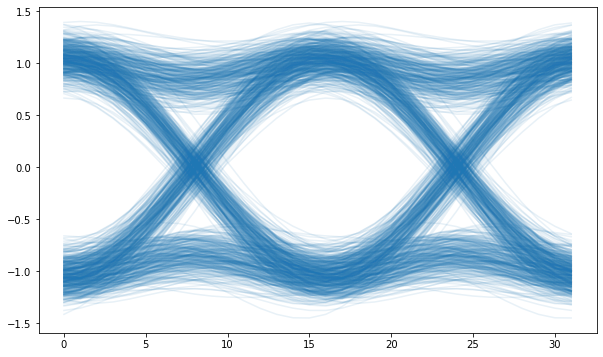

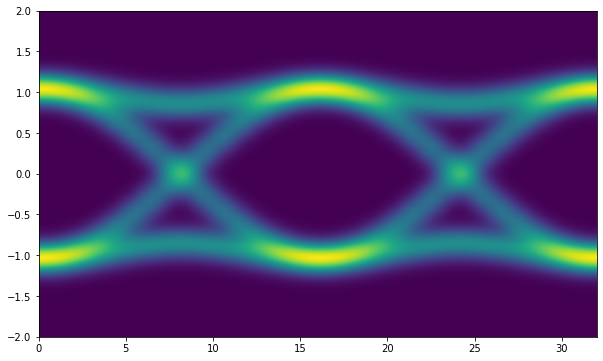

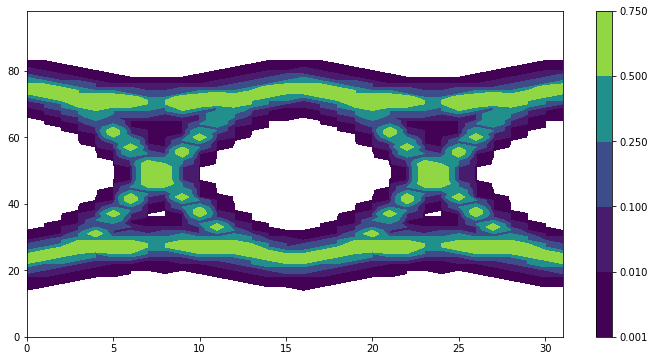

In [4]:
process('data/dwingeloo_eye.c64', sel)

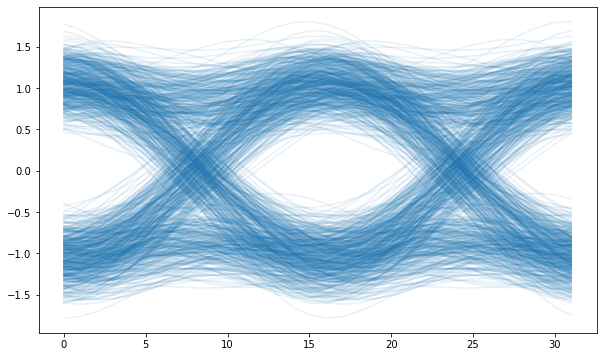

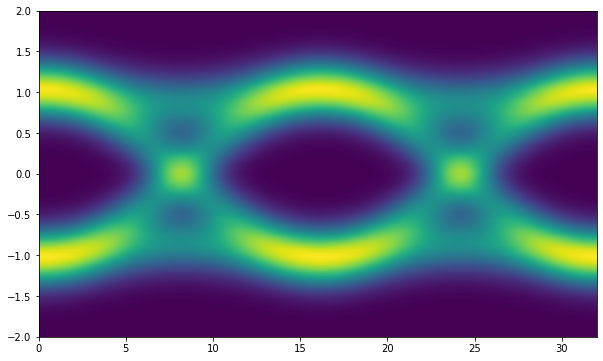

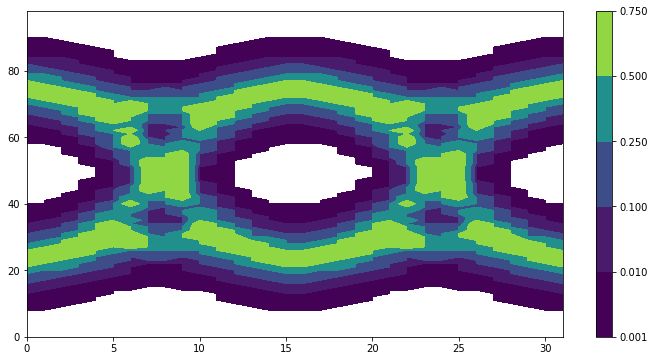

In [5]:
process('data/wakayama_eye.c64', sel)

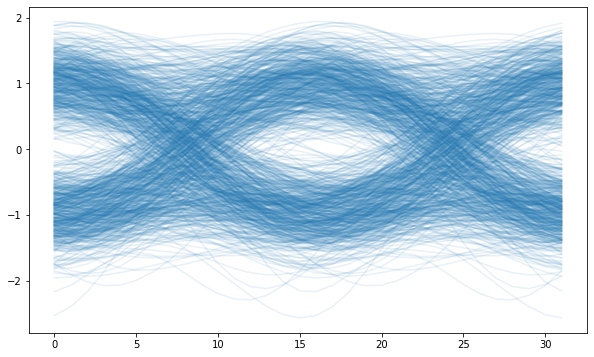

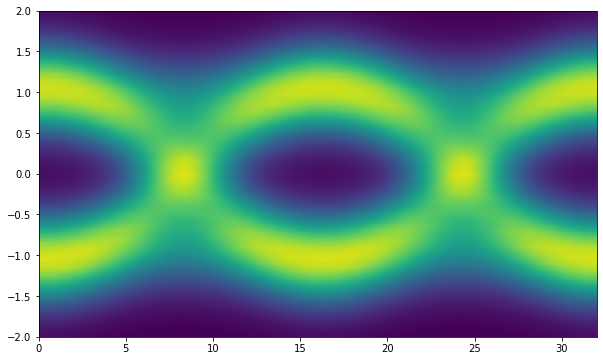

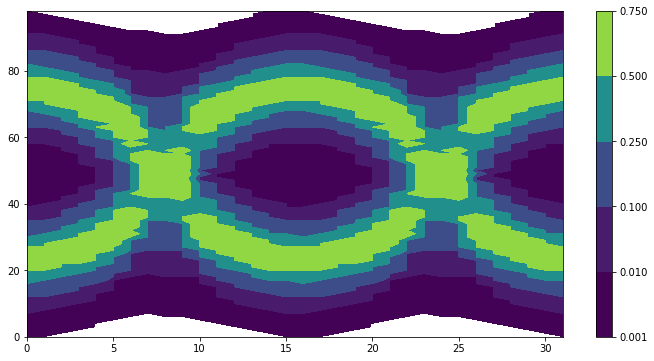

In [6]:
process('data/shahe_eye.c64', sel[3500:])